# AI - ML Salaries 

In [170]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import autoreload
import missingno as msno
import warnings
import os
import csv
import sys

from collections import defaultdict, Counter

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()

%matplotlib inline
%reload_ext autoreload
%autoreload 2
# plt.rcParams.update(14)

warnings.filterwarnings('ignore')

In [231]:
df = pd.read_csv("D:\Open Classroom\Datasets\AI-ML Salaries\salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,130000,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,90000,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,120000,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,100000,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,85000,US,100,US,M


In [232]:
df.shape

(1332, 11)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
work_year             1332 non-null int64
experience_level      1332 non-null object
employment_type       1332 non-null object
job_title             1332 non-null object
salary                1332 non-null int64
salary_currency       1332 non-null object
salary_in_usd         1332 non-null int64
employee_residence    1332 non-null object
remote_ratio          1332 non-null int64
company_location      1332 non-null object
company_size          1332 non-null object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


In [234]:
df.describe().round()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.0,1332.0,1332.0,1332.0
mean,2022.0,237712.0,123375.0,64.0
std,1.0,1077369.0,65946.0,45.0
min,2020.0,2324.0,2324.0,0.0
25%,2022.0,80000.0,75593.0,0.0
50%,2022.0,130000.0,120000.0,100.0
75%,2022.0,175100.0,164997.0,100.0
max,2022.0,30400000.0,600000.0,100.0


In [235]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [236]:
df.drop(columns = ['salary_in_usd'], inplace=True)

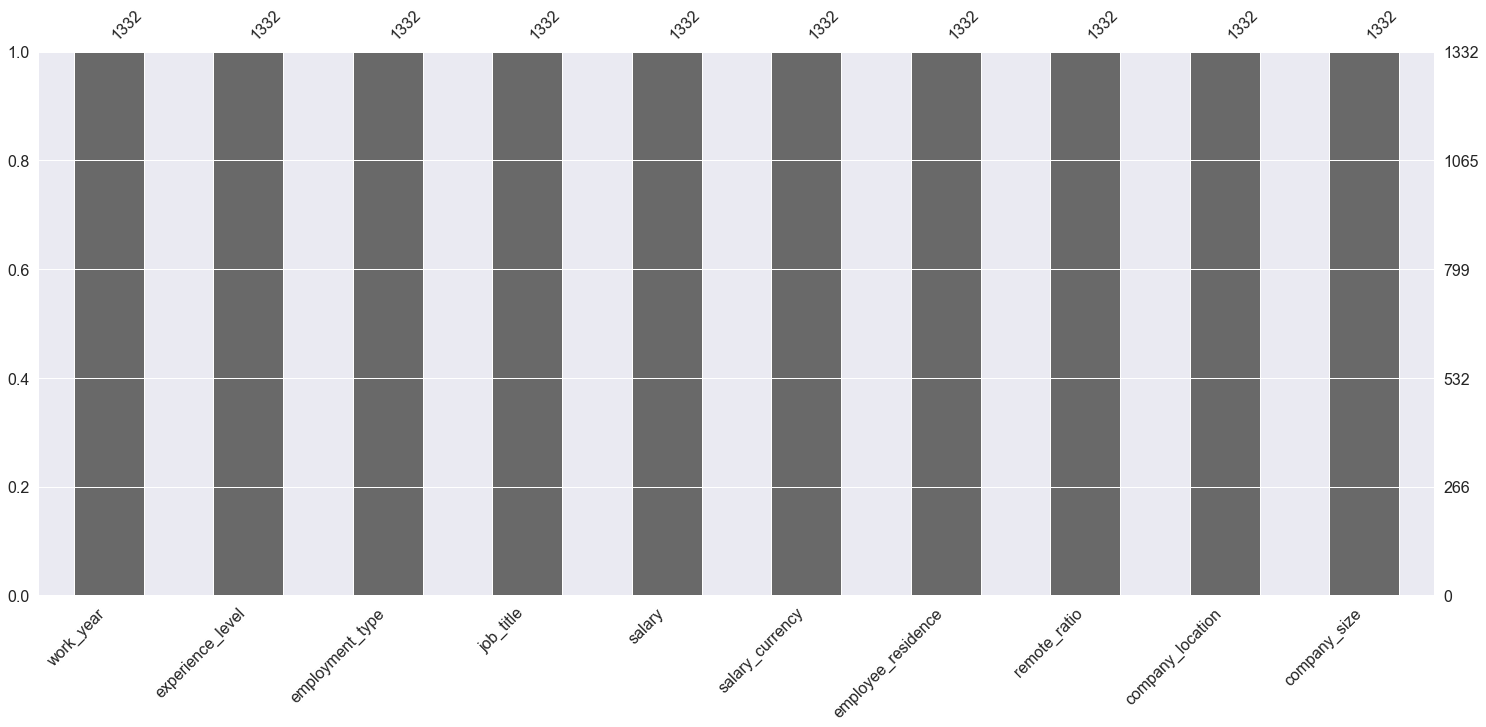

In [237]:
msno.bar(df)

Text(0.5, 1, 'Pearsons correlation of columns')

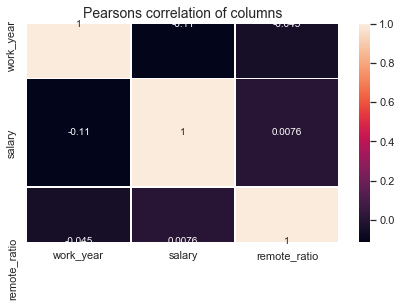

In [238]:
plt.figure(figsize = (7, 4))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.title('Pearsons correlation of columns', fontdict={'size':14})

In [239]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,US,100,US,M


In [240]:
df['work_year'].value_counts()

2022    1029
2021     228
2020      75
Name: work_year, dtype: int64

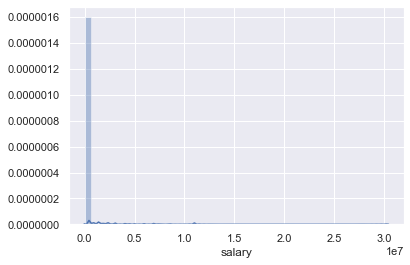

In [241]:
sb.distplot(df['salary'])

In [242]:
sorted(df['salary'].unique())
df = df[df['salary'] < 10000000]

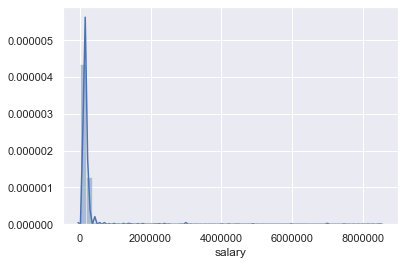

In [243]:
sb.distplot(df['salary'])

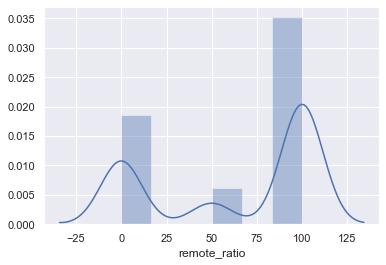

In [244]:
sb.distplot(df['remote_ratio'])

In [245]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,US,100,US,M


Text(0, 0.5, '')

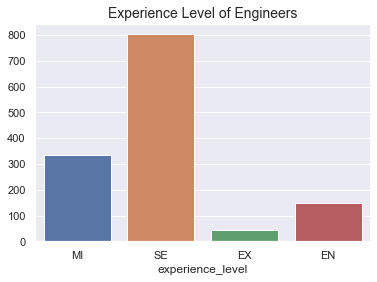

In [246]:
sb.countplot(df['experience_level'])
plt.title('Experience Level of Engineers', fontdict={'size':14})
plt.ylabel(None)

Text(0.5, 0, '')

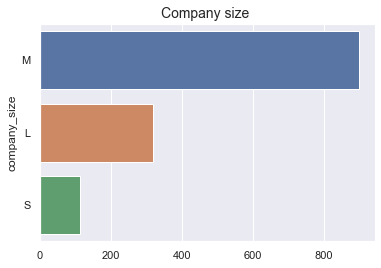

In [247]:
sb.countplot(y = df['company_size'])
plt.title('Company size ', fontdict={'size':14})
plt.xlabel(None)

In [248]:
round(df['job_title'].value_counts(normalize=True)*100, 2)

Data Scientist                              25.73
Data Engineer                               24.08
Data Analyst                                14.30
Machine Learning Engineer                    6.47
Analytics Engineer                           3.24
Data Architect                               2.78
Data Science Manager                         2.18
Research Scientist                           1.50
ML Engineer                                  1.20
Machine Learning Scientist                   1.13
AI Scientist                                 0.90
BI Data Analyst                              0.83
ETL Developer                                0.75
Big Data Engineer                            0.68
Applied Machine Learning Scientist           0.68
Data Science Consultant                      0.68
Business Data Analyst                        0.60
Director of Data Science                     0.60
Data Operations Engineer                     0.60
Head of Data                                 0.53


### Feature Engineering

In [249]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,MI,FT,Machine Learning Engineer,130000,USD,US,0,US,M
1,2022,MI,FT,Machine Learning Engineer,90000,USD,US,0,US,M
2,2022,MI,FT,Data Scientist,120000,USD,US,100,US,M
3,2022,MI,FT,Data Scientist,100000,USD,US,100,US,M
4,2022,MI,FT,Data Scientist,85000,USD,US,100,US,M


In [250]:
def categoricals(data):
    cat_cols = (data.dtypes == 'object')
    cat_list = list(cat_cols[cat_cols].index)
    le = LabelEncoder()
    for i in cat_list:
        data[i] = le.fit_transform(data[i])

In [251]:
categoricals(df)

In [252]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2022,2,2,47,130000,15,61,0,55,1
1,2022,2,2,47,90000,15,61,0,55,1
2,2022,2,2,30,120000,15,61,100,55,1
3,2022,2,2,30,100000,15,61,100,55,1
4,2022,2,2,30,85000,15,61,100,55,1


In [253]:
x = df.drop(columns = ['salary'])
y = df['salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (1063, 9)
x test (266, 9)
y train (1063,)
y test (266,)


In [254]:
def run_experiments(model):
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    print('')
    print('Metrics Evaluation of \n', str(model))
    print('R^2 Score : ', r2_score(y_test, pred))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, pred)))
    print('MAE : ', mean_absolute_error(y_test, pred))

In [255]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
lgr = LogisticRegression()
lsvr = LinearSVR()

models = {
    lr: LinearRegression(),
    dtr: DecisionTreeRegressor(),
    lgr: LogisticRegression(),
    lsvr: LinearSVR()
    
}

for i in models.keys():
    run_experiments(i)


Metrics Evaluation of 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R^2 Score :  -0.04814273161513927
RMSE :  408898.09305479
MAE :  137462.66608330273

Metrics Evaluation of 
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
R^2 Score :  0.562668886405411
RMSE :  264125.3342445003
MAE :  68009.43803135805

Metrics Evaluation of 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=Fals

Point to Note:
DecisionTreeRegressor() out-performed the rest models with the lowest RootMeanSquaredError 

In [266]:
def manual_testing(model, data):
    input_data = data
    
    input_data_to_array = np.asarray(input_data)
    
    reshape_input_data_to_array = input_data_to_array.reshape(1, -1)
    
    model.fit(x_train, y_train)
    
    pred = model.predict(reshape_input_data_to_array)
        
    print(pred)

In [267]:
manual_testing(dtr, [2020, 3, 2, 43, 15, 61, 100, 55, 2])

[48000.]


In [273]:
df.drop(columns = ['salary']).sample(5)

,work_year,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
501,2022,2,2,15,15,61,0,55,0
1214,2020,3,2,43,15,61,100,55,2
25,2022,3,2,21,15,61,0,55,1
1167,2021,3,2,55,15,61,100,55,1
484,2022,3,2,30,15,61,0,55,1


In [272]:
df.iloc[1078]

work_year              2021
experience_level          2
employment_type           2
job_title                62
salary                53000
salary_currency           7
employee_residence       24
remote_ratio             50
company_location         21
company_size              1
Name: 1078, dtype: int64